In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

np.random.seed(129)


### Hypothesis Testing

* Definitions:
   * A statistic is the piece of information computed directly on a sample
   * A param is the opposite of the statistic and applies to the complete population

* Hypothesis is an assumption about a population parameter

* The goal of a hypothesis test is to select between two competing hypotheses

* The difference between parametric a non-parametric methods:
  * Parametric methods make assumptions about the parameters and the underlying distributions
  * Non-parametric methods do not make any assumptions about underlying params and their distributions


### Hypothesis Testing Questions

* In Hypothesis testing, we are typically interested in:
    1. A measure of the difference between two hypotheses.
        * This is referred to as the `effect size.`
        * Economists have shown that universal basic income makes people happier
            * The results were statistically significant.
            * But how much happier are they? If participants are 1% happier, is it worth spending \$43 billion (expected cost in Canada) on the universal basic income?

    2. Probabilities associated with the measured difference 
      * How variable is the measured or inferred difference?

        * How likely is it that the difference is due to chance alone?

        * This is referred to as `p-value.`

### Data In Hypothesis Testing


* Can involve data from either one or two samples. For instance:
    * Comparing a single sample to a population with a known mean.  

        * E.g. You use a new math curriculum on a *sample* of randomly selected students and compare the results to the national average. 
        * Does your curriculum improve math exam scores (compared to the national average.)
 
    * Comparing two samples to   determine whether there is a difference between both
        * E.g. you teach your math curriculum to a group of students in the morning and another group of students in the afternoon
        * Is there a difference between learning math in the morning or the afternoon?

### Terminology

* We are typically testing two hypotheses

  * The first hypothesis assumes that there is no change in our system 
    * Any changes that we observe are merely due to natural variance in the population
    * This is referred to as the null hypothesis ($H_0$)
  * The second hypothesis assumes the differences we are observing are not likely to arise due to chance alone
    * By "not likely," we mean something that would probabilistically rare in occurrence
    * This is referred to as the alternative hypothesis ($H_a$)


### Terminology - Cont'd

* The alternative hypothesis can be:

1. Single-tailed
  * Our new method improves the average score compared to the national average
    $\mu_{new\_method} > \mu_{national\_score}$
   
  * A new medication decreases cholesterol levels  
    $\mu_{cholesterol\_treatment} < \mu_{cholesterol\_control}$

2. Two-tailed
  * The vlaues must be diferent from a given value
   * Ex. Rate of prescription of opiods in Hawaii is different fromt the national average. This implied
   $\mu_{opioids\_hawaii} < \mu_{opioids\_natioanlly}$ or $\mu_{opioids\_hawaii} > \mu_{opioids\_natioanlly}$


### About the Hypothesis tests

* Hypotheses ($H_0$ and $H_a$) are mutually exclusive.
  * Ex.: * There is a difference or there is no difference 
  * But not: the difference is greater than 0 or greater than 10. 

* A null hypothesis can never be proven to be true
  * Failing to prove that the alternative is true only makes the null plausible. 
  *  We say that we fail to reject the null hypothesis or that the study did not find sufficient evidence to reject the null hypothesis.

* We will say that the results are statistically significant when they are unlikely to be due to chance alone

### Example: Data from a Theoretical Distribution

* Suppose the data comes from two normal distributions
  * The distributions have means $\mu_1= 232$ and $\mu_2 = 219$
  * The standard deviations is the same for both distributions ($\sigma = 12$)
  
* These could perhaps your app average ad time in minutes viewed daily on YouTube versus Vimeo
   * We have 90 days worth of viewing data

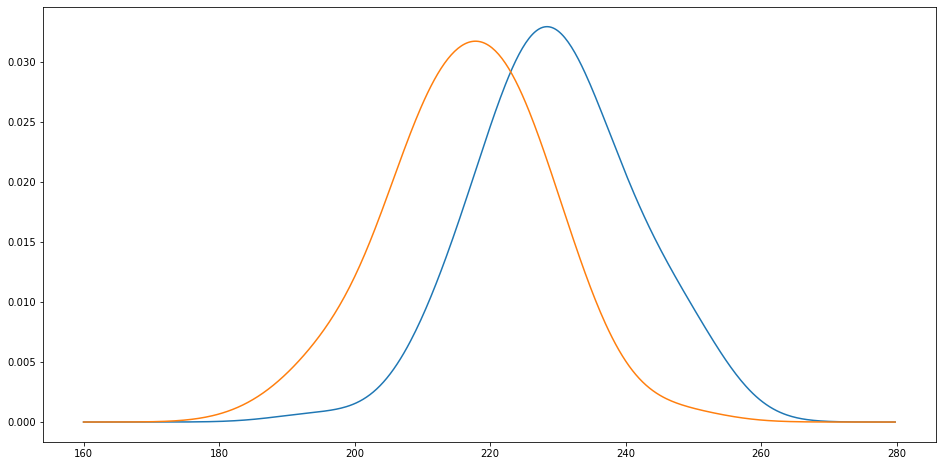

In [22]:
plt.figure(figsize=(16,8))
data_1 = np.random.normal(232, 12, 90)
data_2 = np.random.normal(219, 12, 90)

kde_1 = sp.stats.gaussian_kde(data_1, bw_method=0.6)
kde_2 = sp.stats.gaussian_kde(data_2, bw_method=0.55)

x_values = np.arange(160, 280, 0.25)
# Estimate Kernel density for the support (x-axis)
x_densities_1 = kde_1.evaluate(x_values)
x_densities_2 = kde_2.evaluate(x_values)
plt.plot(x_values, x_densities_1)
plt.plot(x_values, x_densities_2)

Text(0.5, 0, 'Minutes of viewing')

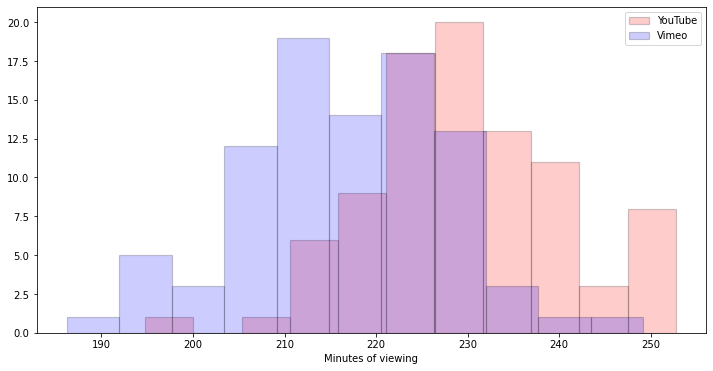

In [27]:
np.random.seed(129)
plt.figure(figsize=(12,6))

youtube = np.random.normal(232, 12, 90)
vimeo = np.random.normal(219, 12, 90)

_ = plt.hist(youtube, edgecolor='k', linewidth=1.2, bins=11, color='r', alpha=0.2, label="YouTube")
_ = plt.hist(vimeo, edgecolor='k', linewidth=1.2, bins=11, color='b', alpha=0.2, label="Vimeo")
plt.legend()
plt.xlabel("Minutes of viewing")



### Assessing the Variability of our Statistic - Different Samples


* The difference between the means is a useful statistic to assess the difference between both samples
  * We call a statistic computed on the observed data `the observed statistic`

* Given that the data consists of random samples, collecting new data will undoubtedly lead to a change in observed statistic

* We need a distribution of the difference between the two samples to compare our statistic.
  * This is the distribution of the test statistic under the null hypothesis


In [4]:
np.mean(youtube) - np.mean(vimeo)

12.970384335616558

### Assessing the Variability of our Statistic - Different Samples

* we'll start with an example where the samples are clearly (visually) different
  * To do so, we generate a dataset with $\sigma=2$

![](https://www.dropbox.com/s/hozq22hz2fyjrg8/two_dists.png?dl=1)
    


In [ ]:
np.random.seed(129)
plt.figure(figsize=(12,6))

youtube = np.random.normal(232, 2, 90)
vimeo = np.random.normal(219, 2, 90)

_ = plt.hist(youtube, edgecolor='k', linewidth=1.2, bins=11, color='r', alpha=0.2, label="YouTube")
_ = plt.hist(vimeo, edgecolor='k', linewidth=1.2, bins=11, color='b', alpha=0.2, label="Vimeo")
plt.legend()
plt.xlabel("Minutes of viewing")



### Question

* What is the mean of the distriution of the difference between the means?

```python
youtube = np.random.normal(232, 2, 90)
vimeo = np.random.normal(219, 2, 90)
means_difference.append(np.mean(youtube) - np.mean(vimeo))
```

<img src="https://www.dropbox.com/s/ytq5x9itagt5c9w/what_is_the_mean.png?dl=1" alt="drawing" style="width:1200px;"/>



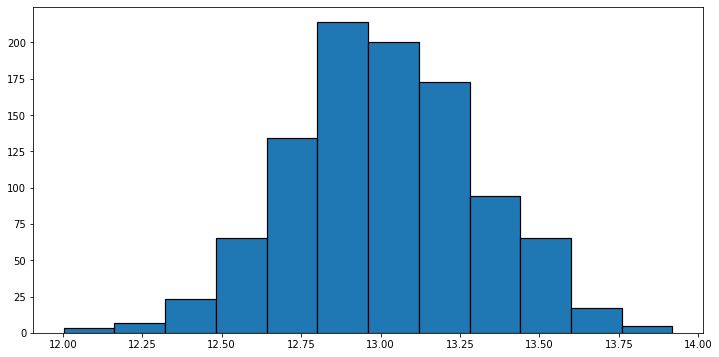

In [5]:
plt.figure(figsize=(12,6))
means_difference = []

for _ in range(1000):
    youtube = np.random.normal(232, 2, 90)
    vimeo = np.random.normal(219, 2, 90)

    means_difference.append(np.mean(youtube) - np.mean(vimeo))
    
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)

### Assessing the variability of our statistic - Similar Samples

* What does the difference between two sample of the same distributions look like on average?

  
```python
youtube_1 = np.random.normal(232, 2, 90)
youtube_2 = np.random.normal(232, 2, 90)
means_difference.append(np.mean(youtube_1) - np.mean(youtube_2))
```


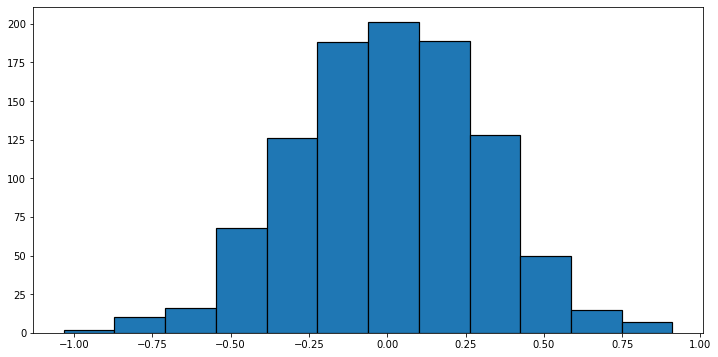

In [6]:
plt.figure(figsize=(12,6))
means_difference = []
for _ in range(1000):
    youtube_1 = np.random.normal(232, 2, 90)
    youtube_2 = np.random.normal(232, 2, 90)

    means_difference.append(np.mean(youtube_1) - np.mean(youtube_2))
    
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12,)

### Assessing the Variability of Our Statistic - Similar Samples - Cont'd

* Data in `youtube_1` and `youtube_2` comes from the same distribution
* Instead of generating new datasets, we can:
  1. Generate the data in the same call to `np.random.normal` and then  split the data into `youtube_1` and `youtube_2`
  2. We could even permute the data and split it randomly across `youtube_1` and `youtube_2`


In [7]:
a = np.array([1,2,3,4,5])
# shuffles the data in place
np.random.shuffle(a)
print(f"Shuffled data is {a}")

print(f"Chunk 1 is {a[:2]}")
print(f"Chunk 2 is {a[2:]}")


Shuffled data is [5 3 4 1 2]
Chunk 1 is [5 3]
Chunk 2 is [4 1 2]


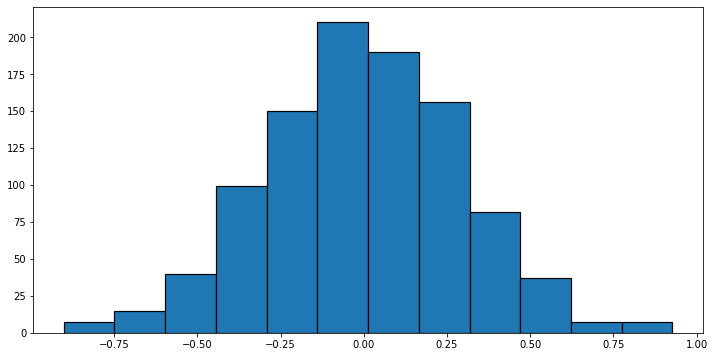

In [8]:
# 1. Generating the data in the same call, splitting or shuffling the data does not change the results

plt.figure(figsize=(12,6))
means_difference = []


for _ in range(1000):
    # Generate 180 days worth of data in each iteration
    all_data = np.random.normal(232, 2, 180)
    # shuffle the data and then split it
    # over youtube_1 and youtube_2
    np.random.shuffle(all_data)
    youtube_1 = all_data[0:90]
    youtube_2 = all_data[90:]
    means_difference.append(np.mean(youtube_1) - np.mean(youtube_2))
    
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)

### Question

* What would the distribution of differences between the means of concatenated (merged) and permutated (shuffled) Vimeo and YouTube looks like? 

```
all_data = np.concatenate([youtube, vimeo])

for _ in range(1000):
    np.random.shuffle(all_data)
    S1 = all_data[:90]
    S2 = all_data[90:]
    means_difference.append(np.mean(S1) - np.mean(S2))
```

<img src="https://www.dropbox.com/s/6vvg176dgb964w4/unknown_mean.png?dl=1" alt="drawing" style="width:600px;"/>



###  Concatenated and Permutated Youtube and Vimeo Samples 

<img src="https://www.dropbox.com/s/5fgmggf1fwg53vg/permutation.png?dl=1" alt="drawing" style="width:200px;"/>


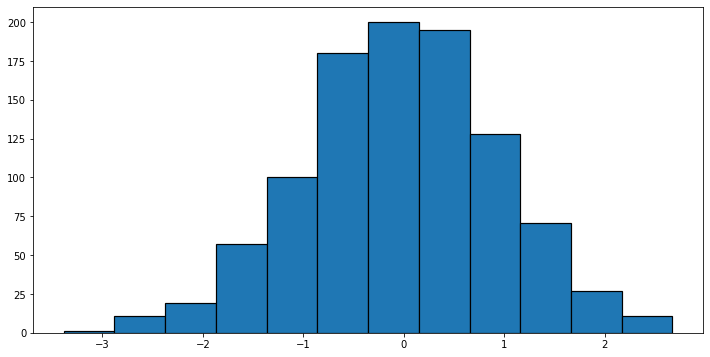

In [10]:
plt.figure(figsize=(12,6))
means_difference = []
youtube = np.random.normal(232, 2, 90)
vimeo = np.random.normal(219, 2, 90)
all_data = np.concatenate([youtube, vimeo])
for _ in range(1000):
    np.random.shuffle(all_data)
    youtube_s = all_data[:90]
    vimeo_s = all_data[90:]
    means_difference.append(np.mean(youtube_s) - np.mean(vimeo_s))
    
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)

### Question 1

* What would the distribution of differences between the means of permutated Vimeo and YouTube look like? 

### Answer 

* The mean of the distribution of differences is 0 since the experiment is equivalent to sampling from a single large population of both youtube and Vimeo viewers.


### Question 2

* What would the distribution of the shuffled difference between Vimeo and Youtube if the samples are not balanced?
 * Say, for instance, one sample has 100 and the second has four times more individuals


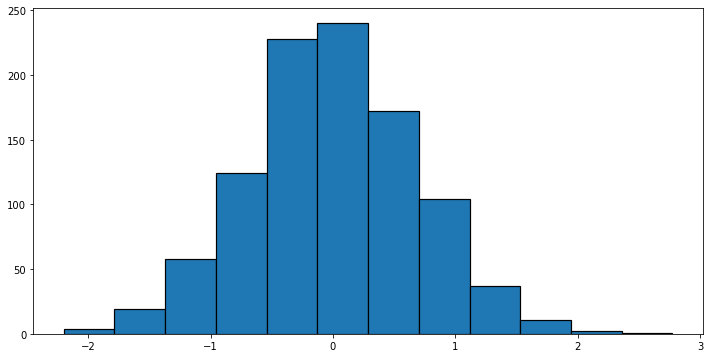

In [11]:

plt.figure(figsize=(12,6))
means_difference = []
youtube = np.random.normal(232, 2, 90)
vimeo = np.random.normal(219, 2, 400)
all_data = np.concatenate([youtube, vimeo])
for _ in range(1000):
    np.random.shuffle(all_data)
    youtube_s = all_data[:90]
    vimeo_s = all_data[90:]
    means_difference.append(np.mean(youtube_s) - np.mean(vimeo_s))
    
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)

### Original Observation Vs. Distribution Under the Null


<img src="https://www.dropbox.com/s/0biskkm8qmc379z/youtube_vimeo_difference.png?dl=1" alt="drawing" style="width:800px;"/>

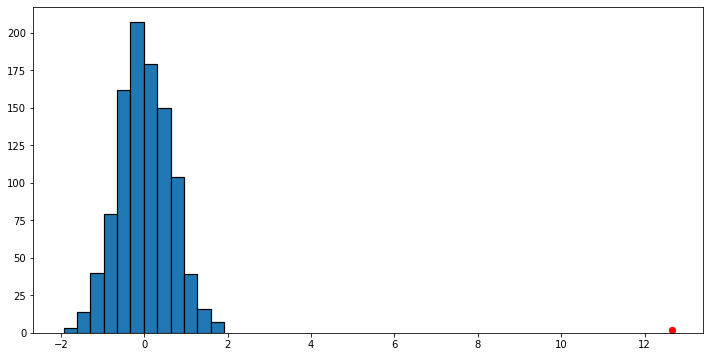

In [50]:
plt.figure(figsize=(12,6))
means_difference = []
youtube = np.random.normal(232, 2, 90)
vimeo = np.random.normal(219, 2, 400)
all_data = np.concatenate([youtube, vimeo])
for _ in range(1000):
    np.random.shuffle(all_data)
    youtube_s = all_data[:90]
    vimeo_s = all_data[90:]
    means_difference.append(np.mean(youtube_s) - np.mean(vimeo_s))
    
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)

plt.scatter(np.mean(youtube) - np.mean(vimeo), 2, color = "red", s=40)

### What Have we Learned?

* The difference between the means of samples from the same distribution has a mean of 0

* This is very useful for testing the null hypothesis
  * Under the null hypothesis, we assume that the difference between the values observed across two samples is attributed to chance alone 

* Comparing the observed difference between the means of two samples to that obtained if samples are from the same distribution shows how similar/dissimilar the samples while accounting for sampling variability


### Comparing Samples from Similar Distributions

* What does a plausible observed difference of means look like?

* Is there a difference between the spending of males and females on your e-commerce platform?

* Again we will generate the data form two distributions 
 * The distributions are different but close ($\mu_{male} = 471$ and $\mu_{female} = 450$)
 * The standard deviation is the same for both populations but relatively large ($\sigma = 89$)  



In [45]:
np.random.seed(129)
male_spending = np.random.normal(466, 89, 230)
female_spending = np.random.normal(450, 89, 190)
diff_of_means = np.mean(male_spending) - np.mean(female_spending)
print(f"Difference between means is {diff_of_means}")

Difference between means is 8.356736308940526


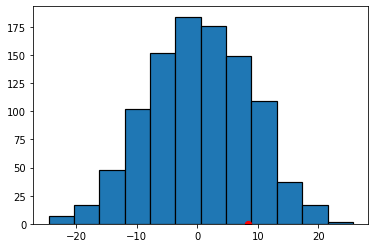

In [46]:
all_data = np.concatenate([male_spending, female_spending])
means_difference = []

for _ in range(1000):
    np.random.shuffle(all_data)
    male_s = all_data[:230]
    female_s = all_data[230:]
    means_difference.append(np.mean(male_s) - np.mean(female_s))
    
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)
plt.scatter(np.mean(male_spending) - np.mean(female_spending), 0, color = "red", s=40)

### How Surprising is an Observed Statistic?

* Out of the 1000 permutations generated, how many were equal to or larger than the observed statistic?
  * We can count the number of simulated statistics that were equal to or larger than the overserved statistic.

* The larger that number, the less "surprised" we are by the observed statistic.

* The smaller that numer, the less likely that the spending of males and females are from the same distribution.


In [47]:
sum(np.array(means_difference) >= diff_of_means)

179

### The P-Value


The p-value is a convention used to estimate how far out into the tails is considered "surprising"
  * Based on the area in the tail, either upper, lower or both.
     * Since we are working on the empirical distribution, it's easy to compute

### The P-value - Cont'd

The P-value is the chance, based on the model in the null hypothesis, that the test statistic is equal to the value that was observed in the data or is even further in the direction of the alternative.

* If a P-value is small, then the observed statistic is far away from what the null predicts.
  * The null is unlikely and the data supports the alternative
  * Typically, P-value is less than 5%,  “statistically significant.”
    * Reasonable to consider that occur in a frequency of 1/20 to be surprising 

* The significance level ($\alpha$) is the probability of rejecting the null hypothesis when it is true. 
  * A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.

### Hypothesis Testing Approach (General Algorithm)

* Strategy used for testing hypotheses will consist of the following steps:

1. We will assume that the null hypothesis is true and will compute some test statistic between the samples, or between the sample and population param.
  * Identifying the appropriate statistic is critical 
    * This is the observed statistic under the null hypothesis

2. Use permutations or bootstrapping to build a distribution of the statistic under the null hypothesis
  
3. Use the inferred distribution of the statistic to infer whether the observed statistic is plausible under the null hypothesis
  * How likely are we to observe a value as extreme or more extreme than the observed statistic
  
  

### Comparing a Sample to a Distribution Param

* Ex. The national average for the math subscore of the SAT is 525, with a standard deviation of 20. Does a sample of 100 students who followed your curriculum fare better than the national average?

1. We can generate bootstrap samples and bootstrap statistics (replicates) and infer the 95% confidence interval for the national SAT Scores
2. If the sample mean of the students who followed your curriculum is included in the 95% confidence interval, then we don't have enough evidence to discard the null hypothesis
  * I.e., The scores obtained by our 100 students are from the theoretical distribution with $\mu = 525$ and $\sigma = 20$
  
  
![](https://www.dropbox.com/s/997cfpe674ujdub/dist_mean.png?dl=1)  


### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    

In [154]:
np.random.seed(0)
a = np.random.normal(20, 4, 15)
b = np.random.normal(20, 4, 15)
np.mean(a), np.mean(b)


(22.748033269279322, 20.794818308826077)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`

In [149]:
import scipy.stats as stats
x_axis = np.arange(0,40,0.5)
kde_1 = sp.stats.gaussian_kde(a, bw_method=0.8)
kde_2 = sp.stats.gaussian_kde(b, bw_method=1)
x_densities_1 = kde_1.evaluate(x_axis)
x_densities_2 = kde_2.evaluate(x_axis)


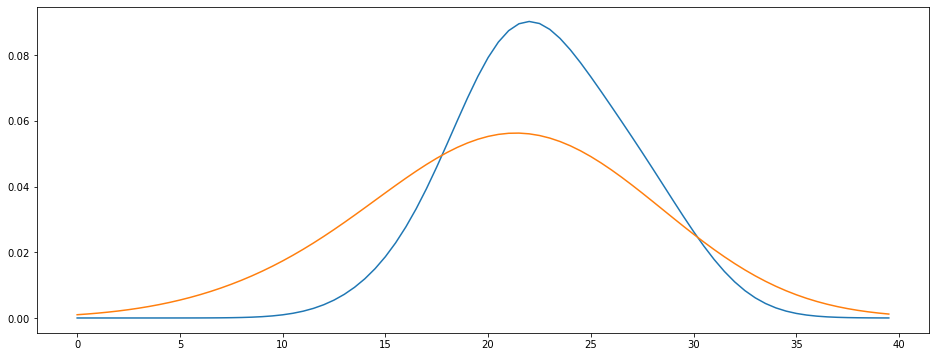

In [150]:
plt.figure(figsize=(16,6))
plt.plot(x_axis, x_densities_1, label="dataset a")
plt.plot(x_axis, x_densities_2, label="dataset b")

In [ ]:
### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.

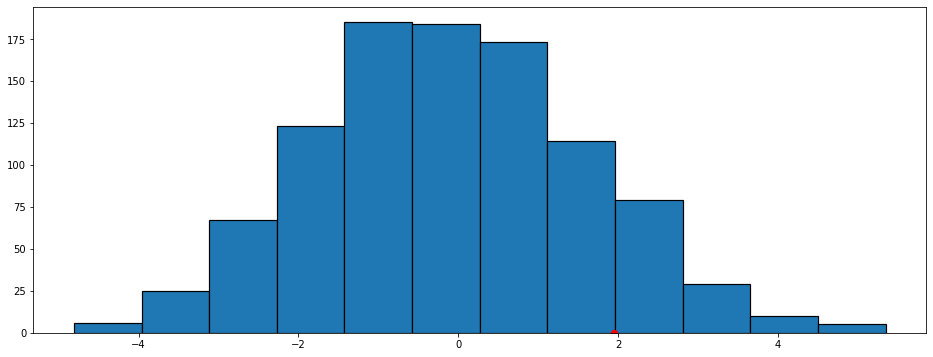

In [155]:
plt.figure(figsize=(16,6))

all_data = np.concatenate([a,b])
means_difference = []

for _ in range(1000):
    np.random.shuffle(all_data)
    a_subset = all_data[:20]
    b_subset = all_data[20:]
    means_difference.append(np.mean(a_subset) - np.mean(b_subset))
    
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)
plt.scatter(np.mean(a) - np.mean(b), 0, color = "red", s=40)

In [153]:
sum(means_difference >= (np.mean(a) - np.mean(b)))

123

In [152]:
sum(means_difference >= (np.mean(a) - np.mean(b))) / len(means_difference) 

0.123